In [150]:
#Working with Lending Club data including data from 2008-2014. Lending Club is
#a crowdsourced lending platform where individuals can lend and borrow cash.

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_main = pd.read_csv('/Users/EagleFace/Documents/Loan_Data/LoanStats3a.csv', skiprows=1, low_memory=False)
df_main.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
#Inspecting all 145 columns of the data, which will have to be trimmed down. 
list(df_main)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [152]:
#Inspecting the categories of loan status
df_main['loan_status'].unique()

array(['Fully Paid', 'Charged Off', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

In [153]:
#The big-money question is on the supply side wondering whether the loan
#will be paid back or not? Note it is cost-free to apply for a lending club loan,
#and there is no hard credit check (thus no market in predicting demand-side). 

df_target = df_main['loan_status'] == 'Fully Paid'
df_target = df_target.astype(int)
df_main['target'] = df_target

In [154]:
#Having set the target to loan status we can clean the data a bit
df_main = df_main.dropna(axis=1, how='all')
df_main = df_main.drop('id', axis=1)

In [155]:
#To further organize the data into categorical and numerical:
df_categorical = df_main.select_dtypes(include=['object'])
df_categorical.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [156]:
#Dropping problematic columns to avoid an error later
df_categorical = df_categorical.drop(['disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date','settlement_status','settlement_date'], axis=1)

In [157]:
print(df_categorical['purpose'].unique())

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational' nan]


In [158]:
print(df_categorical['term'].unique())

[' 36 months' ' 60 months' nan]


In [159]:
list(df_categorical)

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag']

In [160]:
len(df_categorical.columns)

24

In [161]:
#Dropping patently unnecessary columns
df_categorical = df_categorical.drop(['initial_list_status', 'hardship_flag', 'pymnt_plan', 'grade', 'application_type', 'next_pymnt_d', 'title', 'desc', 'zip_code', 'addr_state', 'emp_title'], axis=1)



In [162]:
df_categorical = df_categorical.drop(df_categorical.tail(1).index)
df_categorical = df_categorical.drop(df_categorical.tail(1).index)

In [163]:
df_categorical.int_rate = df_categorical.int_rate.str.rstrip('%').astype(float) / 100.0

In [164]:
df_categorical['term'] = df_categorical['term'] == ' 60months'
df_categorical['term'] = df_categorical['term'].astype(int)

In [165]:
home_ownership = pd.get_dummies(df_categorical['home_ownership'])
df_categorical = df_categorical.join(home_ownership)
df_categorical = df_categorical.drop('home_ownership', axis=1)

In [166]:
df_categorical['verification_status'] = df_categorical['verification_status'] == 'Verified'
df_categorical['verification_status'] = df_categorical['verification_status'].astype(int)

In [167]:
df_categorical.revol_util = df_categorical.revol_util.str.rstrip('%').astype(float) / 100.0

In [168]:
df_categorical['emp_length'] = df_categorical['emp_length'].fillna('n/a')
emp_length = pd.get_dummies(df_categorical['emp_length'])
df_categorical = df_categorical.join(emp_length)
df_categorical = df_categorical.drop('emp_length', axis=1)

In [169]:
purpose = pd.get_dummies(df_categorical['purpose'])
df_categorical = df_categorical.join(purpose)
df_categorical = df_categorical.drop('purpose', axis=1)

In [170]:
df_categorical['sub_grade'] = df_categorical['sub_grade'].astype('category', categories=[grade+str(subgrade) for grade in 'ABCDEFG' for subgrade in range(1, 6)], ordered=True)
df_categorical['sub_grade'] = df_categorical['sub_grade'].cat.codes

In [171]:
df_categorical = df_categorical.drop('n/a', axis=1)
df_categorical = df_categorical.drop('last_pymnt_d', axis=1)
df_categorical = df_categorical.drop('earliest_cr_line', axis=1)
df_categorical = df_categorical.drop('issue_d', axis=1)
df_categorical = df_categorical.drop('last_credit_pull_d', axis=1)

In [172]:
loan_status = pd.get_dummies(df_categorical['loan_status'])
df_categorical = df_categorical.join(loan_status)
df_categorical = df_categorical.drop('loan_status', axis=1)
df_categorical = df_categorical.drop('Does not meet the credit policy. Status:Charged Off', axis=1)
df_categorical = df_categorical.drop('Does not meet the credit policy. Status:Fully Paid', axis=1)
df_categorical.head()

,term,int_rate,sub_grade,verification_status,revol_util,MORTGAGE,NONE,OTHER,OWN,RENT,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Charged Off,Fully Paid
0,0,0.1065,6,1,0.837,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0.1527,13,0,0.094,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0.1596,14,0,0.985,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,0.1349,10,0,0.210,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.1269,9,0,0.539,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [173]:
#Running a query for deviation from zero 

df_numerical = df_main.select_dtypes(include=['int', 'float64'])
df_numerical.std() == 0.0

loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
installment                   False
annual_inc                    False
dti                           False
delinq_2yrs                   False
inq_last_6mths                False
mths_since_last_delinq        False
mths_since_last_record        False
open_acc                      False
pub_rec                       False
revol_bal                     False
total_acc                     False
out_prncp                      True
out_prncp_inv                  True
total_pymnt                   False
total_pymnt_inv               False
total_rec_prncp               False
total_rec_int                 False
total_rec_late_fee            False
recoveries                    False
collection_recovery_fee       False
last_pymnt_amnt               False
collections_12_mths_ex_med     True
policy_code                    True
acc_now_delinq                False
chargeoff_within_12_mths    

In [174]:
df_numerical = df_numerical.drop(['out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'chargeoff_within_12_mths'], axis=1)

In [175]:
df_numerical['mths_since_last_delinq'] = df_numerical['mths_since_last_delinq'].fillna(120.0)
df_numerical['mths_since_last_record'] = df_numerical['mths_since_last_record'].fillna(129.0)

df_numerical['delinq_2yrs'] = df_numerical['delinq_2yrs'].fillna(0.0)
df_numerical = df_numerical.drop('tax_liens', axis=1)
df_numerical['funded_amnt'] = df_numerical['funded_amnt'].fillna(0.0)
df_numerical['loan_amnt'] = df_numerical['loan_amnt'].fillna(0.0)
df_numerical = df_numerical.fillna(0.0)

df_train = df_numerical.join(df_categorical)
df_train = df_train.drop(df_train.loc[df_train['int_rate'].isnull()].index)
df_train = df_train.dropna(axis=0)
df_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Charged Off,Fully Paid
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,1.0,120.0,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,5.0,120.0,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,2.0,120.0,129.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,1.0,35.0,129.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,0.0,38.0,129.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


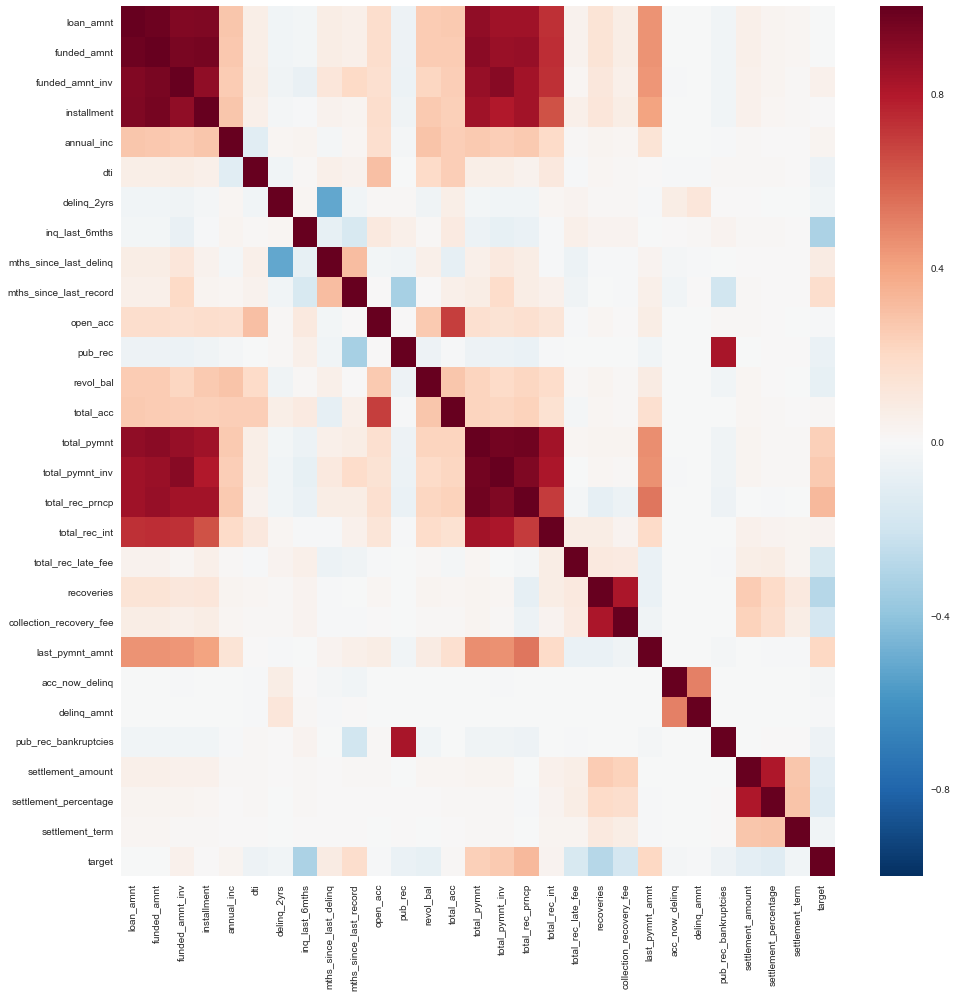

In [176]:
#Correlation Matrix heatmap for numerical factors
corr = df_numerical.corr()

plt.figure(figsize=(16,16))
sns.heatmap(corr)

In [178]:
#This gives us a detailed view of the numerical correlations

##On to the data science
from sklearn.cross_validation import train_test_split

x_train, x_test = train_test_split(df_train)

train_target = x_train['target']
x_train = x_train.drop('target', axis=1)
test_target = x_test['target']
x_test = x_test.drop('target', axis = 1)

In [179]:
#Applying the random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [1, 2, 3] }
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(x_train, train_target)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [180]:
#Predicting loan repayments on the test set using Matthews' Correlation Coefficient

y_pred = clf.predict(x_test)

In [181]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(test_target, y_pred)

0.97609194221547446

In [182]:
#Nicely high accuracy in prediction. Reading the AUC area under the curve
#to measure error

from sklearn.metrics import roc_auc_score

roc_auc_score(test_target, y_pred)

0.98092322185586434

In [ ]:
#Even higher accuracy. 